In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

## Preface ##

In order to get a grasp of clustering analysis we first ought to understand why it is important to calculate distances and how to do it. Let us begin by explaining one of the most often seen formulas for **Euclidian distance.** In **2D** having points $A(x_a,y_a)$ and $B(x_b,y_b)$ the distance is:
$$d = \sqrt{(x_b-x_a)^2+(y_b-y_a)^2} = \sqrt{(\Delta{x})^2 + (\Delta{y})^2}$$

Now that we know that we are going to take a look at clustering analysis, a class of algorithms, what we can do with it, and why it is useful.

### What are clusters of points. How do they relate to real data.

In the real world we can observe that people, objects and principals follow spesific rules when under spesific condition. This is very useful since we are able to actually see patterns and predict the future which is always useful. Some world examples would be:

- Different customers might have different buying behaviors, customers with similar lifestyles and interests might have similar buying behaviors. For example having a newborn would suggest buying stuff for kids.
- Species share similarities in behavior and features
- Some words could be found more in documents conserning a spesific topic
- data collected from different countries would differ.

In light of the above, it is useful to use clustering since it reduces complexity, helps with classification and predictions and reveals structures.

#### Clustering analysis ####

Clustering analysis is exactly this, we take the data and let it arrange itself naturally in clusters. For example:

- Low income: budget buyer
- High income: high spender
- Middle class: moderate spender

Also we can predict for example the grades of students at the school.
Let us have two subjects: maths - english reading

We would have
- high in both
- low in both
- high in one low in the other

Having this we could identify which students might need help.

#### Unsupervised learning ####

When speaking of cluster analysis we need to introduce the term: **unsupervised learning.** The idea behind is that we are not aiming to find patterns, don't label the data. We simple want to **find structure** in the data and **discover**. Some algorithms that are follow this principal are:
- K-Means Clustering
- Hierarchical Clustering
- DBSCAN(Density-Based Spatial Clustering of Applications with Noise)
- Principal Component Analysis (PCA)

Supervised learning on the other hand is trained on labeled data, meaning that the algorithm is provided with input-output pairs during training. The goal here is for the algorithm to learn and predict the correct output for unseen data in the future.

We can see two categories:
- **Classification:** The goal being to predict a category(label). For example, given a set of features about a fruit (color, weight, texture), the model might predict whether it's an apple, orange, or banana.
  * Email spam detection (spam or not spam)
- **Regression:** prediction a continuous value.
  * Prediction housing prices based on features like square footage, number of bedrooms, etc.
 
Some popular algorithms are:
- Linear Regression
- Logistic Regression
- Decision Trees
- Random Forests
- Neural Networks
- Support Vector Machines (SVM)

### How do we define a cluster ###

Now that we know why it would be useful to analyse cluster we should be able to identify when we see one. There are a couple of ways we could differentiate different types of clusters.

#### Distance based ####

We can define clusters looking at the distance between points:
- Euclidian distance
- Manhattan distance
- Cosine simularity (taking a look at the cosine between vectors)

This is the most often used way. An algorith that does it is K-Means which we shall take a look at later

#### Density ####

A density based algorithm is **DBSCAN**. Here we look at areas of **high density points.**

![Density](https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/GUID-A06A412D-2F4F-4D35-8FFF-1F4B3B3A8F16-web.png)

There are also other methods where we could take the distance between groups or based on probability distributions. However we are not going to look at those now.

## K means Clustering ##

As we already discussed K-means clustering is a method using distances to find clusters of data. It is often used for personalized marketing seperating people based on their bying behaviors.

Let us explain how it works. We are going to use **Euclidian distance.** Firstly, we have to decide how many points we need to initialize. Let them be $ k \in \mathbb{N}$.

1. Having $k$ points we randomly initialize them. We call them means or cluster centroids.
2. We take each item and find the distance from it to each of the centroids. Then we assign it to a cluster with a centroid, which is the closest to the item. After that we find the mean between the current items in the cluster and this is our new centroid.
3. After enough repeats, we have our clusters.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

In [11]:
k = 3

clusters = {}

np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
    'center':center,
    'points': points
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

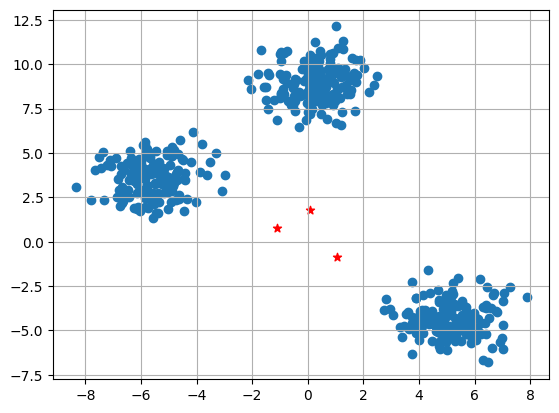

In [15]:
plt.scatter(X[:,0],X[:,1])
plt.grid()
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker ='*',color ='red')
plt.show()

Now let us define our function for the distance.

In [21]:
def distance(p1,p2):
    return np.sqrt((p2[0]-p1[0])**2 +(p2[1]-p1[1])**2 )

In [25]:
def assign_clusters(X,clusters):
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X,clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0]>0:
            new_center = points.mean(axis=0)
            clusters[i]['center'] = new_center
            clusters[i]['points'] = []
    return clusters

In [33]:
def predict_cluster(X,clusters):
    pred = []
    for i in X.shape[0]:
        dist = []
        for j in range(k):
            curr_dist = distance(X[i],clusters[j]['center'])
            dist.append(curr_dist)
            pred.append(np.argmin(dist))
    return pred
            

In [34]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)
print(pred)

[2, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 

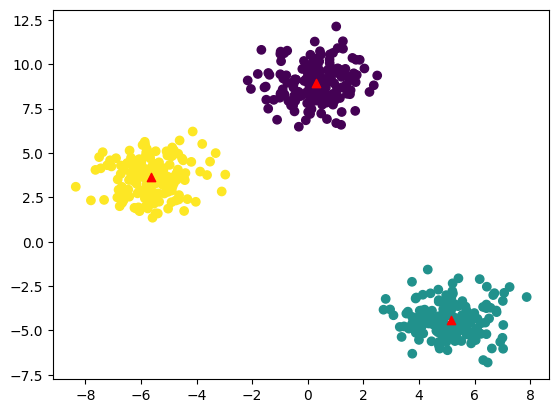

In [35]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()


#### Analyzing the result ####

From the last diagram we can notice that we were able assign clusters, find their center and create a function that is able ti predict, where a point would lie. However we must notice how our algorithm works and why it might not always be the best option. Having the prediction function we are always assigning a point to a specific cluster, which means that even if it were an outlier, we would assign it. One way to go around is to assign a point to a cluster only if it is pass a threshold. We could decide on the threshold by setting it as a specific number or **based on the distribution of distances in the dataset.** Otherwise wee see that K means works properly and simply.

### Convergence ###

As we already discussed we are constantly updating where the center of of each cluster is taking the mean of all points assigned. Therefore, the **within-cluster sum of squares** either **stays the same or decreases.** Considering that each new center is $a_n$ and the final result is $L$ we will see that:
$$ a_1 \leq a_2 \leq a_3 \leq \ldots \leq L < -\infty$$

The above is the **proposition for a convergence of a monotone sequence pf real numbers** and therefore we can say that **k-means clustering converges.

You can find more information about converges and proves [here](https://en.wikipedia.org/wiki/Monotone_convergence_theorem#Convergence_of_a_monotone_series).

### Problems occurring during initialization ###

There is a specific thing we did in the example above. We set a restriction as to where the initial centers could appear. This however is something we have not spoken about in the algorithm. We said that initializing the centers at the start is random. However this could lead to different results. For example if the initial centroids are badly positioned (e.g., too close or at weird parts of the data),
- The algorithm can get stuck at local minimums - it will not find the most optimal clusters.
- The final clusters can be very different depending on the starting centroids.



##### What do we do? #####

There are two main ways in which we could solve the problem: 
- Run K-Means multiple times with **different random  initializations** and pick the best result.

``` KMeans(n_clusters=3, n_init10) ```
- Use a smarter method like **K-Means++ where,**
  * First centroid is random.
  * Each next centroid is chosen **far away** from the existing ones.
```KMenas(init='k-means++')```


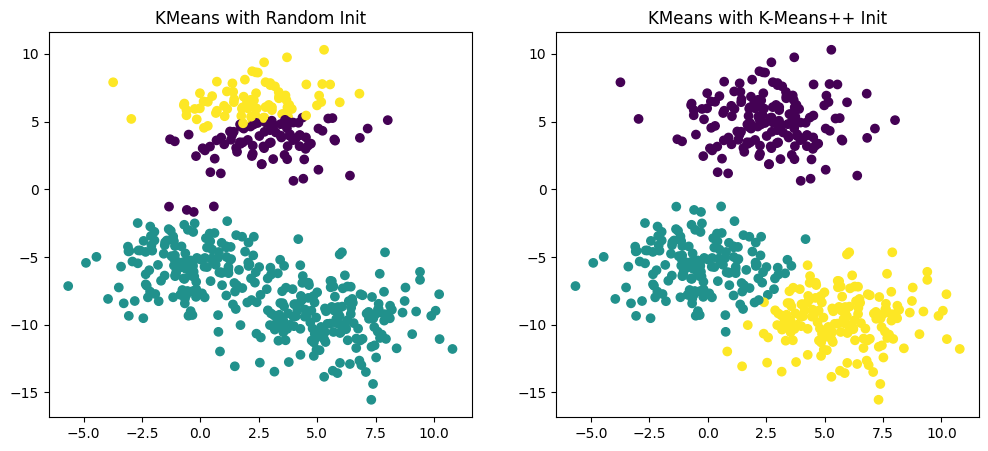

In [92]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Create the dataset
X, y = make_blobs(n_samples=500, n_features=2, centers=3,cluster_std=2, random_state=10)

# KMeans with BAD initialization (random, single run)
kmeans_random = KMeans(n_clusters=3, init='random', n_init=1, random_state=1)
kmeans_random.fit(X)
labels_random = kmeans_random.labels_

# KMeans with GOOD initialization (k-means++, single run)
kmeans_plus = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=1)
kmeans_plus.fit(X)
labels_plus = kmeans_plus.labels_

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Random init
axs[0].scatter(X[:, 0], X[:, 1], c=labels_random, cmap='viridis')
axs[0].set_title('KMeans with Random Init')

# KMeans++ init
axs[1].scatter(X[:, 0], X[:, 1], c=labels_plus, cmap='viridis')
axs[1].set_title('KMeans with K-Means++ Init')

plt.show()


### Analyzing the results ###

If we take a look at the plots we will quickly notice that different clusters have been defined. The K-Means++ was capable of producing better results than the KMeans with random initialization, looking at the plot and trusting our intuition. However there are ways in which we can measure how good our clusters are:
- **Silhouette Score:** Measures how similar each point is to its own cluster compared to other clusters. A higher silhouette score indicates better clustering.
- **Inertia (Within-cluster sum of squares):** Measures how tight the clusters are. Lower inertia means more compact clusters, which indicates better clustering.
- **Adjusted Rand Index (ARI):** Compares the clustering result to a ground truth (if available) to measure the quality of the clustering.

Let us use Silhouette Score to determine if we can numerically find a difference between the two clustering methods. 

In [93]:
from sklearn.metrics import silhouette_score

# Silhouette Score for KMeans with random init
silhouette_random = silhouette_score(X, labels_random)
print(f"Silhouette Score (Random Init): {silhouette_random}")

# Silhouette Score for KMeans with KMeans++ init
silhouette_plus = silhouette_score(X, labels_plus)
print(f"Silhouette Score (KMeans++ Init): {silhouette_plus}")

Silhouette Score (Random Init): 0.44663964457695804
Silhouette Score (KMeans++ Init): 0.5979672960738335


We see that the **KMeans++** score higher and therefore is able to describe our data better.

We can conclude that using KMeans++ or running many random initializations and pick the best one would yield better results and deal with the problem of initialization.

## DBSCAN ## 

#### Intro ####

DBSCAN is another very popular clustering method used in ML. I am going to take a look at some pictures, explain what we see, show the algorithm in simple steps, put it into code and analyse the results.

**A good definition for DBACAN would be:** DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together closely packed points, marking outliers as points that are in low-density regions. Unlike methods like k-means, DBSCAN does not require the number of clusters to be specified in advance. It works by identifying core points (which have a minimum number of neighboring points within a given radius), border points (points within the neighborhood of a core point), and noise points (points that do not meet the density criteria). DBSCAN is particularly effective at discovering clusters of arbitrary shape and is robust to outliers.

![Alt](https://cdn-images-1.medium.com/max/640/1*MP0ZCqyW9vPYQCGfs8G-Cg.png)

Some of the advantages that **DBSCAN** has are:

- **Arbitrary-Shaped Clusters:** such clusters take any shape.
- **Noise and Outliers:** We can effectively identify outliers without having to assign them to a cluster

#### How does it work? ####

The first thing we need to define when working with DBSCAN is a radius of the neighborhood around a data point. In our algorithm we are going to look at how many other points surround such core point and create clusters based on that. We have two main definitions:

- **eps**: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.
- **min_samples**: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. If min_samples is set to a **higher value**, DBSCAN will find **denser clusters**, whereas if it is set to a **lower value**, the found clusters will be **more sparse**.

We are going to separate the points into **three different categories**:
- **core points:** These are point that have a sufficient amount of samples in its neighborhood with a radios _eps_.
- **border points:** There points do not have enough neighbors to be considered a core point, but are around core points.
- **outliers:** do not belong to any cluster, typically have no close points.

![Points and radius](https://media.geeksforgeeks.org/wp-content/uploads/20190418023034/781ff66c-b380-4a78-af25-80507ed6ff26.jpeg)

The definitions are here taken from the scikit-learn website: [definitions](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

#### Algorithm ####

We are going to:
1. **Find the core points:** If a point in the dataset has more than min_points points in its neighborhood, it will be considered a core point.
2. **Clusters:** Look at all the core points that are not assigned to a cluster and create a new cluster. Then we find **density-connected points(such points are within the radius of a core point) and they are added to the cluster.
3. **Density Connectivity:** Two points, a and b, are density-connected if there exists a chain of points where each point is within the eps radius of the next, and at least one point in the chain is a core point. This chaining process ensures that all points in a cluster are connected through a series of dense regions.
4. **Find Noise Points:** Any point not considered in a cluster is a noise points.

In [14]:
X, y_true = make_blobs(n_samples=300,centers=4,cluster_std=0.5,random_state=0)

[-1  0 -1  0 -1 -1 -1  2 -1 -1  1 -1  2 -1 -1  2  2  3  1 -1 -1  3  2  1
  1 -1  3  2 -1 -1 -1  0 -1 -1  0 -1  0 -1  1  3 -1  1 -1 -1  1  1  0  1
  0 -1  1  3 -1  3 -1  1 -1 -1  0  3 -1  2 -1  1  1  1 -1  3 -1  1  2 -1
  0  1 -1  0  1  2  3  0 -1  2 -1  3  0 -1  3  2 -1  0  2  3 -1  1  1 -1
 -1  3 -1 -1 -1 -1 -1  3  2  3 -1  2 -1 -1 -1  1  3 -1  3 -1  0 -1 -1 -1
 -1  3  1  3 -1  3  3  1 -1  1 -1  1  1 -1  0 -1 -1  0 -1 -1 -1  1 -1 -1
 -1  1  0 -1  0  0  0  2 -1  2 -1  1  0  1  3  2 -1  2  2 -1  2 -1 -1 -1
 -1 -1  2  0  3 -1 -1  0 -1  3  2  1  3 -1  1  1  2  2 -1  2 -1  0 -1  1
  2  2  1  1 -1 -1  1  0 -1  1 -1  1 -1 -1  1 -1  2 -1  2  1 -1 -1  0  1
  1  3 -1  2  0  3  3 -1 -1 -1 -1 -1  0 -1  2 -1  2 -1  1  2  3  1 -1  1
 -1  2 -1  0  0  0  0  1  1 -1 -1  1  3  2  1 -1 -1 -1  3  0  2  2 -1  3
 -1  1 -1 -1 -1  3  3 -1  1 -1 -1 -1 -1 -1  0  0 -1  3 -1  3  3 -1  0 -1
 -1  2 -1  3  0 -1  0 -1 -1  2 -1  1]
{0, 1, 2, 3, -1}
['y', 'b', 'g', 'r']


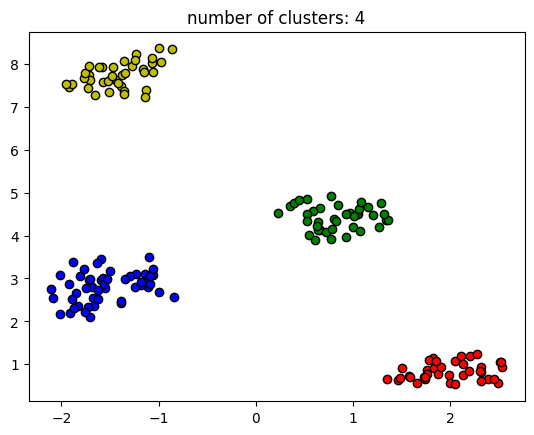

In [16]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print (labels)
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
print(unique_labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


**This code was used from the references in order to show a good example.**

#### Metrics ####

For a quick moment we shall look at metrics and explain what they are.


Let us go through an example to explain why it might be necessary to examine DBSCAN. Take a look at the following picture:
<img src="https://user-images.githubusercontent.com/7659/74451662-d2325000-4e34-11ea-9770-a57e81259eb9.png" style="width: 1200px; height: auto;">

Here we can easily observe how both DBSCAN and k-means can produce different results. In the first graph with circles, we see that DBSCAN looks at the density of the points rather than the distance of a point to a center, which provides a different insight into the data. Additionally, in the third image, where we have nested clusters, DBSCAN can identify the inner clusters and assign them accordingly. But how do we decide which method is better? I will provide a couple of guidelines that explain which method is more appropriate to the situation.

1. **K-Means**
 
- **When we know the number of clusters (k) beforehand:** K-Means requires you to specify the number of clusters (k) we want to partition our data into before running the algorithm.
- **When the clusters are spherical or roughly equal in size:** K-Means works well when the clusters are circular (in higher dimensions, spherical), and their densities are relatively similar.
- **When we have well-separated, convex clusters:** K-Means assumes that clusters are roughly the same size and density, so it works best when this assumption holds true.
- **When we want faster results on large datasets:** K-Means is typically faster than DBSCAN, especially when we know the number of clusters and have a large dataset.

2. **DBSCAN**
- **When we don’t know the number of clusters:** DBSCAN does not require you to specify the number of clusters upfront. It can automatically find clusters based on the density of points.
- **When your data has noise or outliers:** DBSCAN can handle outliers well by classifying them as noise points that don’t belong to any cluster.
- **When the clusters are of varying shapes and densities:** Unlike K-Means, DBSCAN can find arbitrarily shaped clusters, so it's useful when the data has clusters that are not circular or spherical.
- **When dealing with irregularly spaced data:** DBSCAN performs well in cases where clusters are not uniformly distributed in the feature space.

## Hierarchical clustering ##

<img src="https://towardsdatascience.com/wp-content/uploads/2021/08/102TF9l458bkpjtv7MOntCQ.jpeg" 
     alt="Hierarchical Clustering Diagram" 
     style="width: 500px; height: auto;">


Let us take a look at one more method. In hierarchical clustering we are grouping data into a tree-like structure. This aims to produce a **Dendrogram.** The Dendrogram shows how indivitual points or groups of data merge together. Moving from down up similar groups are combined. 

![](https://media.geeksforgeeks.org/wp-content/uploads/20250204154508934309/UntitledDiagram7.png)

The image provided has five points of data. On the right side, we see a **dendrogram**, showing us the grouping. The workflow is as follows
1. Start: Each data point is its own cluster.
2. Compute distances between clusters (using a distance measure like Euclidean distance).
3. Merge the two closest clusters.
4. Repeat steps 2 and 3 until
    - all points are merged into one big cluster (full hierarchy), or
    - a desire number of clusters is formed
5. Visualize the process with a dendrogram — it shows how and when the clusters were merged.

This approach is also know as **agglomerative clustering.**

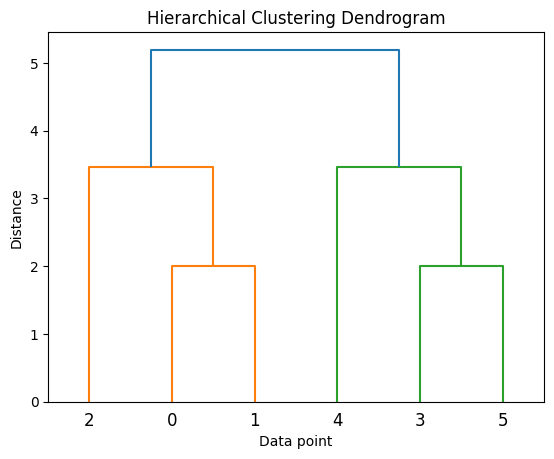

In [3]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

Z = linkage(X, 'ward') # Ward Distance

dendrogram(Z) #plotting the dendogram

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

## References ##

- https://www.geeksforgeeks.org/k-means-clustering-introduction/
- https://www.bing.com/videos/riverview/relatedvideo?q=DBSCAN&mid=35884E6B4BFFDAB2F00035884E6B4BFFDAB2F000&FORM=VIRE
- https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/
- https://www.geeksforgeeks.org/hierarchical-clustering/
- https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8/